In [1]:
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.5/617.5 KB 961.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 18.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 17.6 MB/s eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.36.1
    Uninstalling tqdm-4.36.1:
      Successfully uninstalled tqdm-4.36.1
  Attempting uninstall: requests
    Found existing installation: requests 2.22.0
    Uninstalling requests-2.22.0:
      Successfully uninstalled requests-2.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nanonets 2.0.5 requires requests==2.2

In [6]:
t=!yolo predict model="yolov7.pt" source="293220200512410422000150_id.jpeg" save_txt=True save_conf=True

In [7]:
t

['Traceback (most recent call last):',
 '  File "/home/pratik/.local/lib/python3.10/site-packages/ultralytics/nn/tasks.py", line 563, in torch_safe_load',
 "    return torch.load(file, map_location='cpu'), file  # load",
 '  File "/home/pratik/.local/lib/python3.10/site-packages/torch/serialization.py", line 809, in load',
 '    return _load(opened_zipfile, map_location, pickle_module, **pickle_load_args)',
 '  File "/home/pratik/.local/lib/python3.10/site-packages/torch/serialization.py", line 1172, in _load',
 '    result = unpickler.load()',
 '  File "/home/pratik/.local/lib/python3.10/site-packages/torch/serialization.py", line 1165, in find_class',
 '    return super().find_class(mod_name, name)',
 "ModuleNotFoundError: No module named 'models'",
 '',
 'The above exception was the direct cause of the following exception:',
 '',
 'Traceback (most recent call last):',
 '  File "/home/pratik/.local/bin/yolo", line 8, in <module>',
 '    sys.exit(entrypoint())',
 '  File "/home/pratik

In [245]:
import re
match = re.search(r'd:\\([^:]+)', t[-4])

if match:
    img_path = match.group(0)
    print(img_path)
else:
    print("File path not found in the string.")

d:\ECORP\ocr\test foldder\aa.jpeg


In [246]:
img_name=img_path.split('\\')[-1]

In [247]:
img_name

'aa.jpeg'

In [257]:
label_path=t[-1].split()[-1]
tmp=label_path.split('\\')[:-1]
img_path = '\\'.join(tmp) + '\\' + img_name
print(joined_path)
label_path1 = label_path + '\\'+img_name.split('.')[0]+'.txt'
# tmp1=label_path.split('\\')
# label_path1='\\'.join(tmp1)
print(label_path1)

C:\Users\golup\runs\detect\predict10\aa.jpeg
C:\Users\golup\runs\detect\predict11\labels\aa.txt


In [249]:
updated_path = label_path.replace('\\\\', '\\')
updated_path

'C:\\Users\\golup\\runs\\detect\\predict11\\labels'

In [258]:
# img_path = t[-2].split()[-1]
# tmp = img_path.split('\\')
# dim = len(tmp)
# label_path = ''
# for i,j in enumerate(tmp):
#     if i == 0:
#         label_path = label_path + j
#     elif i == dim-2:
#         label_path = label_path + '\\' + j + '\\labels'
#     elif i == dim-1:
#         label_path = label_path + '\\' + j.split('.')[0] + '.txt'
#     else:
#         label_path = label_path + '\\' + j


with  open(label_path1,'r') as file:
    labels = file.readlines()
img = Image.open(img_path)
img.show()
height  = img.height
width = img.width
detect_list = []
for i in labels:
    value = [float(a) for a in i.split()]
    left_x = int(width * float(value[1] - value[3]/2))
    right_x = int(width * float(value[1] + value[3]/2))
    left_y = int(height * float(value[2] - value[4]/2))
    right_y = int(height * float(value[2] + value[4]/2))
    # print(value)
    detect_list.append([img.crop((left_x, left_y, right_x, right_y)), value[5], left_x, right_x, left_y, right_y, int(value[0])])

lables = ['aadhar no','address','dob','father','gender','name','photo']

In [198]:
import pytesseract
import tempfile
import os
from nanonets import NANONETSOCR

In [ ]:
dir_loc = tempfile.mkdtemp()
model=NANONETSOCR()
model.set_token('3edab03f-18ab-11ee-b7d0-86364e72d134')

In [127]:
from PIL import Image 

t = !python detect.py --conf 0.1 --source "img.jpeg" --view-img --no-trace --save-txt --name plates --project extraction --save-conf --weights "C:\Users\golup\Downloads\best (6) (1).pt"


In [ ]:
t

In [ ]:
img_path = t[-2].split()[-1]
tmp = img_path.split('\\')
dim = len(tmp)
label_path = ''
for i,j in enumerate(tmp):
    if i == 0:
        label_path = label_path + j
    elif i == dim-2:
        label_path = label_path + '\\' + j + '\\labels'
    elif i == dim-1:
        label_path = label_path + '\\' + j.split('.')[0] + '.txt'
    else:
        label_path = label_path + '\\' + j


with  open(label_path,'r') as file:
    labels = file.readlines()
img = Image.open(img_path)
# img.show()
height  = img.height
width = img.width
detect_list = []
for i in labels:
    value = [float(a) for a in i.split()]
    left_x = int(width * float(value[1] - value[3]/2))
    right_x = int(width * float(value[1] + value[3]/2))
    left_y = int(height * float(value[2] - value[4]/2))
    right_y = int(height * float(value[2] + value[4]/2))
    detect_list.append([img.crop((left_x, left_y, right_x, right_y)),value[5],left_x,right_x,left_y,right_y,int(value[0])])

lables = ['aadhar no','address','dob','father','gender','name','photo']


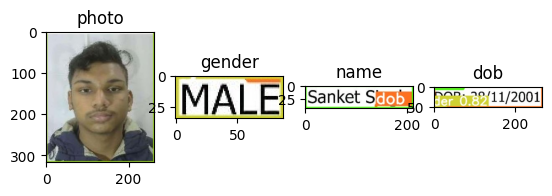

In [259]:
# import matplotlib.pyplot as plt
for i,j in enumerate(detect_list):
    plt.subplot(1,len(detect_list),i+1)
    plt.imshow(j[0])
    plt.title(f'{lables[j[-1]]}')

plt.show()

In [99]:

detect_list1 = {}
for i in detect_list:
    img_na = dir_loc+'\\'+lables[i[-1]]+'.jpg'
    i[0].save(img_na)
    detect_list1[lables[i[-1]]] = [img_na]

In [100]:
detect_list1.pop('pan')

['C:\\Users\\golup\\AppData\\Local\\Temp\\tmpr3i6gvpy\\pan.jpg']

In [101]:
for i in detect_list1.keys():
	detect_list1[i] =model.convert_to_string(detect_list1[i][0])

In [103]:
detect_list1

{'father_name': '20/10/1994',
 'pan_no': 'BMTPC1606C',
 'name': 'ANJALI CHOUDHAR'}